In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
import pickle
warnings.filterwarnings("ignore")

In [2]:
#lets read the data

In [3]:
df=pd.read_csv(r"D:\data.csv")

In [4]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2-5-14,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2-5-14,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2-5-14,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2-5-14,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2-5-14,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2-5-14,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2-5-14,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2-5-14,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2-5-14,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2-5-14,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [5]:
#lets check whether the data contains any null value

In [6]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
# lets check the columns and remove which we don't need in data

In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [9]:
df=df.drop(['view','date','waterfront','country','street'],axis=1)

In [10]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3,1.50,1340,7912,1.5,3,1340,0,1955,2005,Shoreline,WA 98133
1,2.384000e+06,5,2.50,3650,9050,2.0,5,3370,280,1921,0,Seattle,WA 98119
2,3.420000e+05,3,2.00,1930,11947,1.0,4,1930,0,1966,0,Kent,WA 98042
3,4.200000e+05,3,2.25,2000,8030,1.0,4,1000,1000,1963,0,Bellevue,WA 98008
4,5.500000e+05,4,2.50,1940,10500,1.0,4,1140,800,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,4,1510,0,1954,1979,Seattle,WA 98133
4596,5.343333e+05,3,2.50,1460,7573,2.0,3,1460,0,1983,2009,Bellevue,WA 98007
4597,4.169042e+05,3,2.50,3010,7014,2.0,3,3010,0,2009,0,Renton,WA 98059
4598,2.034000e+05,4,2.00,2090,6630,1.0,3,1070,1020,1974,0,Seattle,WA 98178


In [11]:
# lets  convert the data type  becouse bathrooms and floor data must be int

In [12]:
df["bathrooms"]=df["bathrooms"].astype("int64")
df["floors"]=df["floors"].astype("int64")
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3,1,1340,7912,1,3,1340,0,1955,2005,Shoreline,WA 98133
1,2.384000e+06,5,2,3650,9050,2,5,3370,280,1921,0,Seattle,WA 98119
2,3.420000e+05,3,2,1930,11947,1,4,1930,0,1966,0,Kent,WA 98042
3,4.200000e+05,3,2,2000,8030,1,4,1000,1000,1963,0,Bellevue,WA 98008
4,5.500000e+05,4,2,1940,10500,1,4,1140,800,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1,1510,6360,1,4,1510,0,1954,1979,Seattle,WA 98133
4596,5.343333e+05,3,2,1460,7573,2,3,1460,0,1983,2009,Bellevue,WA 98007
4597,4.169042e+05,3,2,3010,7014,2,3,3010,0,2009,0,Renton,WA 98059
4598,2.034000e+05,4,2,2090,6630,1,3,1070,1020,1974,0,Seattle,WA 98178


In [13]:
df['age_of_property']=df['yr_renovated'].max()-df['yr_built']

In [14]:
df=df.drop(["yr_built","yr_renovated"],axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,city,statezip,age_of_property
0,3.130000e+05,3,1,1340,7912,1,3,1340,0,Shoreline,WA 98133,59
1,2.384000e+06,5,2,3650,9050,2,5,3370,280,Seattle,WA 98119,93
2,3.420000e+05,3,2,1930,11947,1,4,1930,0,Kent,WA 98042,48
3,4.200000e+05,3,2,2000,8030,1,4,1000,1000,Bellevue,WA 98008,51
4,5.500000e+05,4,2,1940,10500,1,4,1140,800,Redmond,WA 98052,38
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1,1510,6360,1,4,1510,0,Seattle,WA 98133,60
4596,5.343333e+05,3,2,1460,7573,2,3,1460,0,Bellevue,WA 98007,31
4597,4.169042e+05,3,2,3010,7014,2,3,3010,0,Renton,WA 98059,5
4598,2.034000e+05,4,2,2090,6630,1,3,1070,1020,Seattle,WA 98178,40


In [15]:
# lets encode the data

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def encode(data):
    for i in data.columns:
        if data[i].dtypes=="object":
            data[i]=le.fit_transform(df[i])
    return data


In [17]:
df=encode(df)


In [18]:
#lets check skewness of data

In [19]:
df.skew()

price              24.790933
bedrooms            0.456447
bathrooms           0.975297
sqft_living         1.723513
sqft_lot           11.307139
floors              0.665686
condition           0.959068
sqft_above          1.494211
sqft_basement       1.642732
city               -0.761791
statezip           -0.146474
age_of_property     0.502155
dtype: float64

In [20]:
#lets remove the skewness of the data

In [21]:
target=df["price"]
features=df.drop(["price","age_of_property"],axis=1)

In [22]:
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,city,statezip
0,3,1,1340,7912,1,3,1340,0,36,62
1,5,2,3650,9050,2,5,3370,280,35,58
2,3,2,1930,11947,1,4,1930,0,18,26
3,3,2,2000,8030,1,4,1000,1000,3,7
4,4,2,1940,10500,1,4,1140,800,31,31
...,...,...,...,...,...,...,...,...,...,...
4595,3,1,1510,6360,1,4,1510,0,35,62
4596,3,2,1460,7573,2,3,1460,0,3,6
4597,3,2,3010,7014,2,3,3010,0,32,37
4598,4,2,2090,6630,1,3,1070,1020,35,71


In [23]:
from sklearn.preprocessing import power_transform
def removing_skew(data):
    array=power_transform(data)
    new=pd.DataFrame(array,columns=data.columns)
    return new


features=removing_skew(features)
df=pd.concat([features,target],axis=1)


print(df.skew())


bedrooms          0.033101
bathrooms        -0.000408
sqft_living       0.000297
sqft_lot         -0.084521
floors            0.315563
condition        -0.126640
sqft_above        0.014519
sqft_basement     0.408029
city             -0.581482
statezip         -0.303421
price            24.790933
dtype: float64


In [24]:
#lets visualize the data

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'city'}>],
       [<Axes: title={'center': 'statezip'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

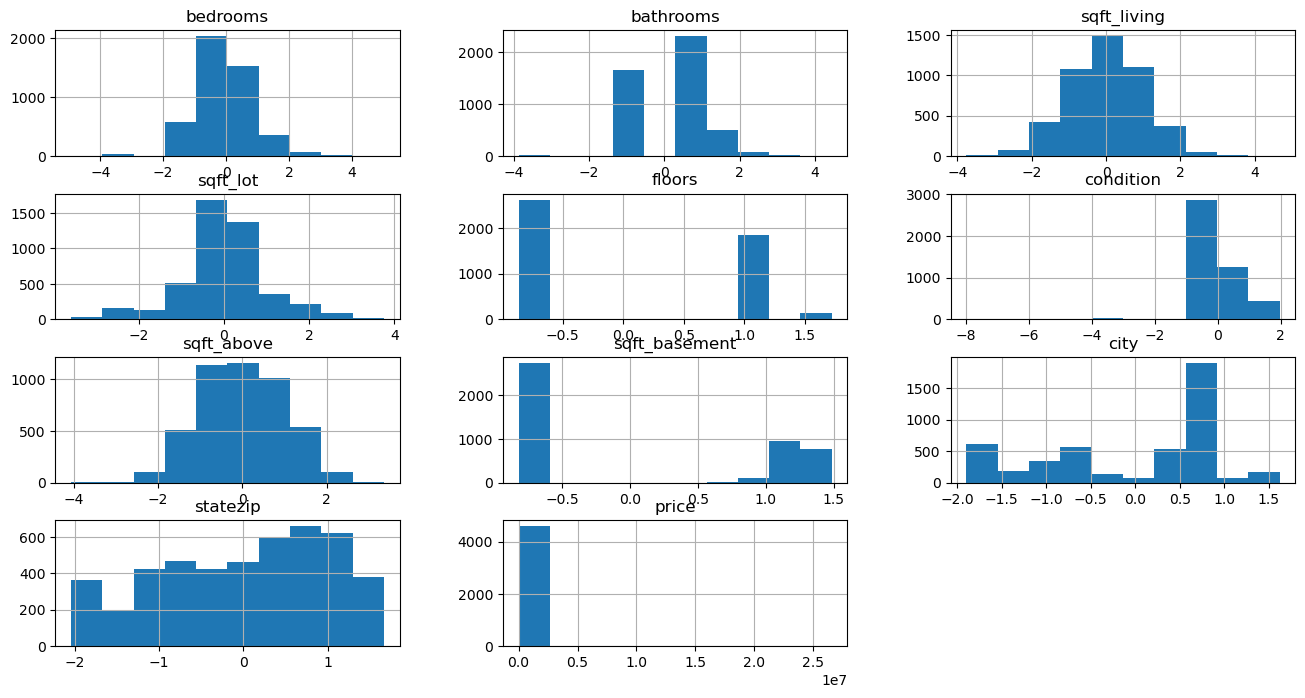

In [25]:
plt.rcParams['figure.figsize']=(16,8)
df.hist()

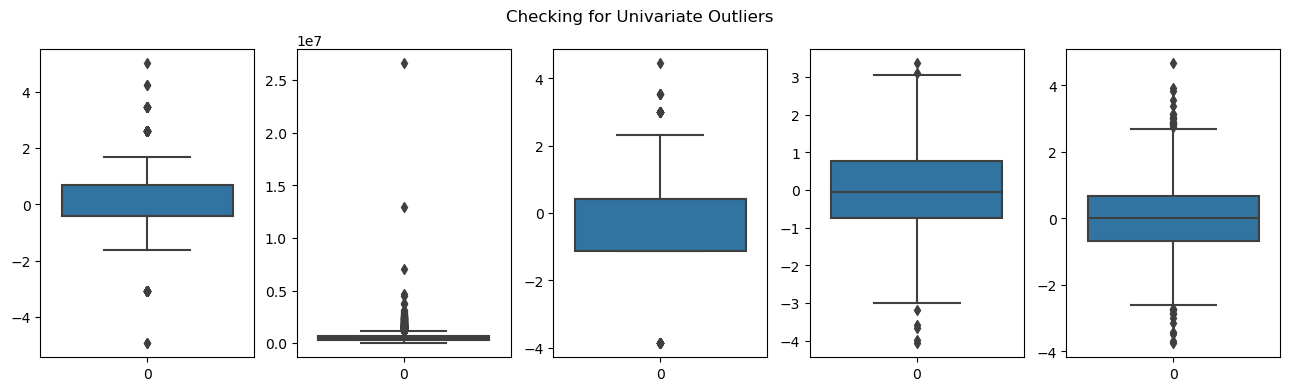

In [26]:
#lets visualize the outliars in data
plt.rcParams['figure.figsize']=(16,4)


plt.subplot(1,5,1)
sns.boxplot(df['bedrooms'])

plt.subplot(1,5,2)
sns.boxplot(df['price'])


plt.subplot(1,5,3)
sns.boxplot(df['bathrooms'])

plt.subplot(1,5,4)
sns.boxplot(df['sqft_above'])

plt.subplot(1,5,5)
sns.boxplot(df['sqft_living'])



plt.suptitle("Checking for Univariate Outliers")
plt.show()


In [27]:
#removing outliars


from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)


new=df[(z<3).all(axis=1)]


In [28]:
new

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,city,statezip,price
0,-0.401735,-1.135438,-0.876706,0.053381,-0.865644,-0.641471,-0.452664,-0.820138,0.897670,1.082785,313000.0000
2,-0.401735,0.415690,-0.033902,0.506690,-0.865644,0.908991,0.395222,-0.820138,-0.749875,-0.554197,342000.0000
3,-0.401735,0.415690,0.049019,0.070262,-0.865644,0.908991,-1.185227,1.284536,-1.771682,-1.571570,420000.0000
4,0.688242,0.415690,-0.021881,0.368322,-0.865644,0.908991,-0.851262,1.250952,0.406947,-0.311453,550000.0000
5,-1.631016,-1.135438,-1.833739,-0.197246,-0.865644,-0.641471,-1.520712,-0.820138,0.797739,0.737014,490000.0000
...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.401735,-1.135438,-0.602075,-0.200976,-0.865644,0.908991,-0.167352,-0.820138,0.797739,1.082785,308166.6667
4596,-0.401735,0.415690,-0.679626,0.003178,1.102644,-0.641471,-0.247010,-0.820138,-1.771682,-1.632636,534333.3333
4597,-0.401735,0.415690,1.008450,-0.085703,1.102644,-0.641471,1.337734,-0.820138,0.503270,-0.028385,416904.1667
4598,0.688242,0.415690,0.151621,-0.151760,-0.865644,-0.641471,-1.011544,1.287449,0.797739,1.463101,203400.0000


In [29]:
# lets form dependent and independent sets

y = new['price']
x = new.drop(['price'], axis = 1)

print(y.shape)
print(x.columns)

(4437,)
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'city', 'statezip'],
      dtype='object')


In [30]:
# lets split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(3549, 10)
(888, 10)
(3549,)
(888,)


In [31]:
# scalling the data
from sklearn.preprocessing import MinMaxScaler

mms= MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [32]:
# list of models
models = [LinearRegression(n_jobs=10),  RandomForestRegressor(random_state=0),GradientBoostingRegressor(random_state=0)]

In [33]:
def compare_models_cross_validation():

    for model in models:

        cv_score = cross_val_score(model, x_test, y_test, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy, 2)

        print('Cross Validation accuracies for the',model,'=', cv_score)
        print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
        print('---------------------------------------------------------------')



In [34]:
compare_models_cross_validation()

Cross Validation accuracies for the LinearRegression(n_jobs=10) = [0.37551927 0.46268602 0.47706594 0.35161498 0.38411628]
Acccuracy score of the  LinearRegression(n_jobs=10) = 41.02 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestRegressor(random_state=0) = [0.54166185 0.58141521 0.54077569 0.49690808 0.52196922]
Acccuracy score of the  RandomForestRegressor(random_state=0) = 53.65 %
---------------------------------------------------------------
Cross Validation accuracies for the GradientBoostingRegressor(random_state=0) = [0.64981511 0.60266064 0.54959398 0.47429382 0.4964807 ]
Acccuracy score of the  GradientBoostingRegressor(random_state=0) = 55.46 %
---------------------------------------------------------------


In [35]:
#
def compare_models_cross_validation():

    for model in models:

        cv_score = cross_val_score(model, x_train, y_train, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy, 2)
  
        print('Cross Validation accuracies for the',model,'=', cv_score)
        print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
        print('---------------------------------------------------------------')


In [36]:

compare_models_cross_validation()

Cross Validation accuracies for the LinearRegression(n_jobs=10) = [0.34803168 0.45312203 0.35330103 0.44555812 0.36903488]
Acccuracy score of the  LinearRegression(n_jobs=10) = 39.38 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestRegressor(random_state=0) = [0.60967706 0.66966751 0.57082812 0.61119966 0.51280867]
Acccuracy score of the  RandomForestRegressor(random_state=0) = 59.48 %
---------------------------------------------------------------
Cross Validation accuracies for the GradientBoostingRegressor(random_state=0) = [0.62501073 0.66593754 0.58403608 0.60818437 0.54986695]
Acccuracy score of the  GradientBoostingRegressor(random_state=0) = 60.66 %
---------------------------------------------------------------


In [37]:
# list of models
models_list = [LinearRegression(copy_X=True,n_jobs=1),  RandomForestRegressor(n_estimators=10,criterion='squared_error'),GradientBoostingRegressor(n_estimators=20,criterion='squared_error')]


In [38]:
# creating a dictionary that contains hyperparameter values for the above mentioned models
model_hyperparameters = {
    

    'linear_reg_hyperparameters': {
        'copy_X':[True,False],
        'n_jobs' : [1,5,10,20],
        
    },

    'random_forest_regressor': {
        
        'n_estimators' : [10,20,50,100],
    'criterion':['squared_error',"absolute_error", "friedman_mse", "poisson"]
    },

    'gradient_boosting_hyperparameters' : {
        
         'n_estimators' : [10,20,50,100],
        'criterion':['squared_error',"absolute_error", "friedman_mse", "poisson"]
    }
}

In [39]:

print(type(model_hyperparameters))

<class 'dict'>


In [40]:
print(model_hyperparameters.keys())

dict_keys(['linear_reg_hyperparameters', 'random_forest_regressor', 'gradient_boosting_hyperparameters'])


In [41]:

print(model_hyperparameters['linear_reg_hyperparameters'])

{'copy_X': [True, False], 'n_jobs': [1, 5, 10, 20]}


In [42]:
model_keys = list(model_hyperparameters.keys())

In [43]:
print(model_keys)

['linear_reg_hyperparameters', 'random_forest_regressor', 'gradient_boosting_hyperparameters']


In [44]:
print(model_keys[0])


linear_reg_hyperparameters


In [45]:
print(model_hyperparameters[model_keys[0]])

{'copy_X': [True, False], 'n_jobs': [1, 5, 10, 20]}


In [46]:
compare_models_cross_validation()

Cross Validation accuracies for the LinearRegression(n_jobs=10) = [0.34803168 0.45312203 0.35330103 0.44555812 0.36903488]
Acccuracy score of the  LinearRegression(n_jobs=10) = 39.38 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestRegressor(random_state=0) = [0.60967706 0.66966751 0.57082812 0.61119966 0.51280867]
Acccuracy score of the  RandomForestRegressor(random_state=0) = 59.48 %
---------------------------------------------------------------
Cross Validation accuracies for the GradientBoostingRegressor(random_state=0) = [0.62501073 0.66593754 0.58403608 0.60818437 0.54986695]
Acccuracy score of the  GradientBoostingRegressor(random_state=0) = 60.66 %
---------------------------------------------------------------


In [47]:
# lets find which is the best model to fit
def ModelSelection(list_of_models, hyperparameters_dictionary):

    result = []

    i = 0

    for model in list_of_models:

        key = model_keys[i]

        params = hyperparameters_dictionary[key]

        i += 1

        print(model)
        print(params)
        print('---------------------------------')


        regressor = GridSearchCV(model,params, cv=5)

        # fitting the data to regressor
        regressor.fit(x_train,y_train)

        result.append({
                'model used' : model,
                'highest score' : regressor.best_score_,
                'best hyperparameters' : regressor.best_params_
            })

        result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

        return result_dataframe


In [48]:
ModelSelection(models_list, model_hyperparameters)

LinearRegression(n_jobs=1)
{'copy_X': [True, False], 'n_jobs': [1, 5, 10, 20]}
---------------------------------


,model used,highest score,best hyperparameters
0,LinearRegression(n_jobs=1),0.39381,"{'copy_X': True, 'n_jobs': 1}"


In [49]:
# lets make pickle file
lnr=LinearRegression(n_jobs=1,copy_X=True)
lnr.fit(x_train,y_train)
import pickle
with open("mymodel.pkl","wb") as file_data:
    pickle.dump(lnr,file_data)

mymodel=pickle.load(open('mymodel.pkl','rb'))